In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cPickle
from glob import glob
from collections import defaultdict

In [2]:
BERResults = defaultdict(list)
PKTResults = defaultdict(list)

prefix = "BER"
folderList = ["LabAirTests/04-11-16:16/"]

for operatingFolder in folderList:
    files = glob(operatingFolder+prefix+"*")
    print("Operating Folder :"+operatingFolder)
    print("len files"+str(len(files)))
    for berFile in files:
        total_bit_loss = cPickle.load(file(berFile))  # Load in the test data

        # Determine the SNR Value from the file name.
        fileName = berFile.split('/')[len(berFile.split('/'))-1]
        snrStart = fileName.find('.SNR')+4
        snrValue = float(fileName[snrStart:len(fileName)-7])

        # Determine the number of packets dropped for this test.
        dropped_pkts = total_bit_loss.count(1.0)

        # Determine the average BER
        meaningfulBER = [i for i in total_bit_loss if i != 1.0]
        if len(meaningfulBER) != 0:
            BERavg = np.mean(np.array(meaningfulBER))
            BERResults[snrValue].append(BERavg)

        PKTResults[snrValue].append(dropped_pkts)

Operating Folder :LabAirTests/04-11-16:16/
len files105


In [3]:
xBER = BERResults.keys()
xPKT = PKTResults.keys()
xBER.sort()
xPKT.sort()

BERAvg = list()
PKTAvg = list()
for i in xBER:
    BERAvg.append(np.mean(BERResults[i])*100)
for i in xPKT:
    PKTAvg.append(np.mean(PKTResults[i]))

/home/odroid/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


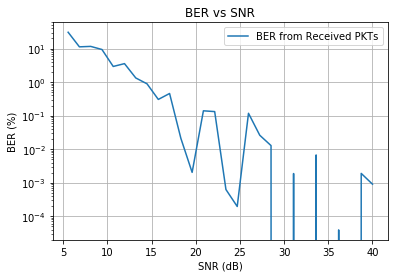

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(xBER,BERAvg,label="BER from Received PKTs")
ax.legend()
plt.xlabel("SNR (dB)")
plt.ylabel("BER (%)")
plt.title("BER vs SNR")
plt.grid("on")
ax.set_yscale('log')

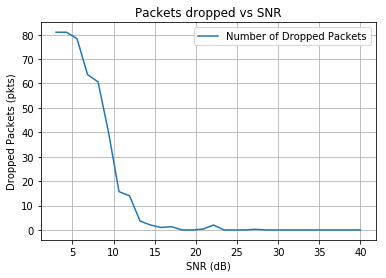

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(xPKT,PKTAvg,label="Number of Dropped Packets")
ax.legend()
plt.xlabel("SNR (dB)")
plt.ylabel("Dropped Packets (pkts)")
plt.title("Packets dropped vs SNR")
plt.grid("on")

In [99]:
BERResults[15]

[0.0, 0.0, 0.0]